In [2]:
import  yahoo_fin.stock_info as yf
import pandas as pd
import openpyxl
import xlsxwriter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import math 
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#Get a list of tickers of Dow 30 (for example)
dowTickers=yf.tickers_dow()

In [29]:
# Appending prices for each ticker - Dow 30
Prices=[]

for i in dowTickers:
    Prices.append(yf.get_data(i)["adjclose"])
    
# Creating a dataframe with the abovementioned list.
PriceData=pd.DataFrame(Prices).T
PriceData.columns = dowTickers # change column names to the ticker´s name.

# Select timeframe
initialDate= "2016/01/29"
finalDate= "2019/01/04"
PriceData=PriceData.loc[initialDate:finalDate]

PriceData.head(-2)

AAPL        AMGN        AXP          BA         CAT  \
2016-01-29  22.346193  126.703445  48.495087  107.736610   52.625225   
2016-02-01  22.137295  126.720024  49.582832  109.019081   53.014164   
2016-02-02  21.689634  124.529900  48.640110  105.395859   51.297756   
2016-02-03  22.118925  125.011047  49.048027  109.297104   53.496113   
2016-02-04  22.296656  124.364029  49.292774  110.857582   55.770561   
...               ...         ...        ...         ...         ...   
2018-12-26  38.039845  169.265213  89.003159  305.044769  114.258324   
2018-12-27  37.792976  171.490723  89.799858  308.163971  116.007538   
2018-12-28  37.812336  171.851120  89.553261  307.425446  115.036766   
2018-12-31  38.177799  175.401123  90.406868  313.372223  116.373863   
2019-01-02  38.221371  172.905289  90.748322  314.645142  115.741951   

                   CRM       CSCO        CVX         DIS  DOW  ...        MRK  \
2016-01-29   68.059998  19.406031  65.023788   90.400726  NaN  ...  39.466930   
2016-02-01   68.440002  19.153152  64.136467   89.768623  NaN  ...  39.529236   
2016-02-02   64.519997  18.622929  61.090939   87.853424  NaN  ...  39.264427   
2016-02-03   65.339996  18.843176  63.632645   89.759178  NaN  ...  38.984013   
2016-02-04   67.199997  19.202097  63.760452   90.032776  NaN  ...  37.846813   
...                ...        ...        ...         ...  ...  ...        ...   
2018-12-26  130.839996  37.962021  91.085869  104.552254  NaN  ...  63.204128   
2018-12-27  135.199997  38.355316  92.722862  105.233910  NaN  ...  64.382790   
2018-12-28  134.679993  38.230183  92.154572  106.004501  NaN  ...  64.374252   
2018-12-31  136.970001  38.730736  92.273323  108.326126  NaN  ...  65.262512   
2019-01-02  135.550003  38.391071  93.884865  107.654343  NaN  ...  64.562157   

                 MSFT        NKE         PG         TRV         UNH  \
2016-01-29  49.635010  57.896935  68.434845   91.982353  104.283546   
2016-02-01  49.292648  58.970657  67.957344   91.956551  104.944580   
2016-02-02  47.751968  58.401112  67.203384   91.114388  103.124451   
2016-02-03  46.995132  58.345112  67.940559   91.853416  102.101158   
2016-02-04  46.850986  56.178989  67.605484   92.369019  103.414223   
...               ...        ...        ...         ...         ...   
2018-12-26  96.814774  70.691948  82.504684  107.858902  230.656647   
2018-12-27  97.411682  71.330978  84.272179  109.239700  233.139984   
2018-12-28  96.651100  71.011459  83.502914  108.843864  233.395920   
2018-12-31  97.787140  71.786064  84.180603  110.233864  236.125671   
2019-01-02  97.353928  71.708595  83.594467  108.042999  230.789352   

                     V         VZ        WBA        WMT  
2016-01-29   71.321899  37.357639  65.582268  57.836365  
2016-02-01   71.216576  37.948238  65.870216  58.829945  
2016-02-02   70.278259  37.312775  64.167305  58.272141  
2016-02-03   71.216576  37.843563  63.188343  57.757915  
2016-02-04   70.546349  37.701530  63.500957  57.888660  
...                ...        ...        ...        ...  
2018-12-26  127.371986  46.151367  59.259426  85.155876  
2018-12-27  129.112885  46.753265  59.819462  86.267281  
2018-12-28  128.066406  46.854992  59.548199  86.775909  
2018-12-31  129.044449  47.660355  59.793213  87.736633  
2019-01-02  130.002945  47.490807  59.539448  87.915588  

[737 rows x 30 columns]

In [50]:
#Describe Data
print(PriceData.shape)
PriceData.describe()

(739, 29)


Stocks        AAPL        AMGN         AXP          BA         CAT  \
count   739.000000  739.000000  739.000000  739.000000  739.000000   
mean     35.432369  149.248589   77.963531  221.617288  100.635711   
std       9.309358   17.293027   15.995372   90.095802   28.175262   
min      20.978714  114.361969   46.328671   98.152573   51.297756   
25%      26.235631  135.437134   60.540352  125.139771   75.288212   
50%      36.294468  148.959076   78.969963  196.935928   96.038162   
75%      41.731144  162.314392   92.584896  320.671524  126.787598   
max      55.972599  187.636932  107.071251  379.444489  153.792175   

Stocks         CRM        CSCO         CVX         DIS          GS  ...  \
count   739.000000  739.000000  739.000000  739.000000  739.000000  ...   
mean     99.776265   30.712117   89.398092  100.374844  194.150600  ...   
std      26.384911    6.621943   10.536749    7.373760   34.622069  ...   
min      54.049999   18.361898   61.090939   83.824928  125.379494  ...   
25%      77.989998   25.581822   81.387203   94.193398  154.326637  ...   
50%      90.260002   28.468552   89.631706  100.358612  206.626205  ...   
75%     121.974998   37.795872   97.937145  106.459377  219.121948  ...   
max     160.429993   43.629055  109.107201  116.560318  251.236450  ...   

Stocks         MRK        MSFT         NKE          PG         TRV  \
count   739.000000  739.000000  739.000000  739.000000  739.000000   
mean     50.317173   72.155378   58.755866   74.754136  109.990416   
std       5.724497   19.976391    9.367228    4.943314    9.566254   
min      37.846813   44.255169   46.713547   63.818836   89.172318   
25%      46.438107   53.463856   51.375654   70.511715  102.128983   
50%      50.125183   67.813736   55.138798   74.949867  109.809395   
75%      52.398235   89.557621   65.074398   78.277943  117.931725   
max      67.293335  110.825478   82.588684   88.503189  134.916214   

Stocks         UNH           V          VZ         WBA         WMT  
count   739.000000  739.000000  739.000000  739.000000  739.000000  
mean    178.642909  100.416056   40.420691   65.022417   73.577767  
std      46.988311   23.727571    3.367937    5.311157   11.695320  
min      99.629021   64.887695   34.300640   51.632378   55.852085  
25%     130.514175   78.178406   38.379082   60.668184   63.130281  
50%     174.800705   94.486969   39.594883   66.512512   71.759834  
75%     220.198174  121.058926   42.140619   69.041916   82.211182  
max     271.394806  147.216461   51.415871   74.984337  100.791245  

[8 rows x 29 columns]

In [13]:
# Do all the companies have 2249 values?
pd.DataFrame(PriceData.describe().loc["count"])[pd.DataFrame(PriceData.describe().loc["count"])["count"] < (PriceData.shape[0])].index.tolist()

print ("There are companies with less than {0} values. The list of companies.: {1}".format(
(PriceData.shape[0]),
pd.DataFrame(PriceData.describe().loc["count"])[pd.DataFrame(PriceData.describe().loc["count"])["count"] < (PriceData.shape[0])].index.tolist())
)

There are companies with less than 739 values. The list of companies.: ['DOW']


In [14]:
#What is the stock with lowest mean? 
lowest_mean_stock=((PriceData[list(PriceData.columns)]).mean()).idxmin()
print("The stock with lowest mean regarding closing price is {0}.".format(lowest_mean_stock))

#What is the stock with max mean? 
highest_mean_stock=((PriceData[list(PriceData.columns)]).mean()).idxmax()
print("The stock with highest mean regarding closing price is is {0}.".format(highest_mean_stock))

#Which stocks have null values?
stocks_null_values=(pd.DataFrame(PriceData.isnull().sum())>0).index[(pd.DataFrame(PriceData.isnull().sum())>0)[0]].tolist()
print("The stock/s with null values is/are {0}.".format(stocks_null_values))

#Which stocks have completely null data?
stocks_null_valuesTotal=(pd.DataFrame(PriceData.isnull().sum())==(PriceData.shape)[0]).index[(pd.DataFrame(PriceData.isnull().sum())==(PriceData.shape)[0])[0]].tolist()
print("The stock/s which only have null values is/are {0}.".format(stocks_null_valuesTotal))


The stock with lowest mean regarding closing price is CSCO.
The stock with highest mean regarding closing price is is BA.
The stock/s with null values is/are ['DOW'].
The stock/s which only have null values is/are ['DOW'].


In [43]:
#Remove columns with stocks with NaNs
for i in stocks_null_valuesTotal:
    PriceData.drop(i, axis=1, inplace=True)
PriceData

KeyError: "['DOW'] not found in axis"

In [16]:
# Lets consider that we want to remove outliers, quantile 5% and 95%
q_lowest =PriceData.quantile(0.05)
q_highest  = PriceData.quantile(0.95)

PriceDataFiltered = PriceData[(PriceData < q_highest) & (PriceData > q_lowest)]


PriceDataFiltered

AAPL        AMGN        AXP          BA         CAT  \
2016-01-29  22.346197  126.703430        NaN         NaN         NaN   
2016-02-01        NaN  126.720039        NaN         NaN         NaN   
2016-02-02        NaN  124.529930        NaN         NaN         NaN   
2016-02-03        NaN  125.011086        NaN         NaN         NaN   
2016-02-04  22.296652  124.363983        NaN         NaN         NaN   
...               ...         ...        ...         ...         ...   
2018-12-28  37.812336  171.851120  89.553268  307.425446  115.036789   
2018-12-31  38.177803  175.401123  90.406883  313.372223  116.373863   
2019-01-02  38.221371  172.905273  90.748322  314.645142  115.741966   
2019-01-03  34.414234  170.274323  88.976974  302.100555  111.281883   
2019-01-04  35.883354  176.094910  92.986320  317.822571  117.362961   

                   CRM       CSCO        CVX         DIS          GS  ...  \
2016-01-29         NaN        NaN        NaN   90.400711  143.978363  ...   
2016-02-01         NaN        NaN        NaN   89.768608  142.276215  ...   
2016-02-02         NaN        NaN        NaN         NaN  135.191360  ...   
2016-02-03         NaN        NaN        NaN   89.759178  136.064682  ...   
2016-02-04         NaN        NaN        NaN   90.032784  139.460114  ...   
...                ...        ...        ...         ...         ...  ...   
2018-12-28  134.679993  38.230179  92.154572  106.004501  151.463333  ...   
2018-12-31  136.970001  38.730740  92.273338  108.326126  155.198120  ...   
2019-01-02  135.550003  38.391071  93.884857  107.654335  159.824799  ...   
2019-01-03  130.399994  36.994865  92.086716  105.046211  157.483612  ...   
2019-01-04  137.960007  38.661301  93.995125  108.286606  162.630554  ...   

            MRK       MSFT        NKE         PG         TRV         UNH  \
2016-01-29  NaN  49.635006  57.896935  68.434860         NaN         NaN   
2016-02-01  NaN  49.292645  58.970657  67.957344         NaN         NaN   
2016-02-02  NaN  47.751976  58.401119        NaN         NaN         NaN   
2016-02-03  NaN  46.995148  58.345104  67.940590         NaN         NaN   
2016-02-04  NaN  46.850986  56.178974  67.605476         NaN         NaN   
...         ...        ...        ...        ...         ...         ...   
2018-12-28  NaN  96.651100  71.011459        NaN  108.843872  233.395889   
2018-12-31  NaN  97.787148  71.786049        NaN  110.233887  236.125702   
2019-01-02  NaN  97.353905  71.708603        NaN  108.042999  230.789368   
2019-01-03  NaN  93.772438  70.440193  83.008385  106.100670  224.495712   
2019-01-04  NaN  98.133759  72.279869        NaN  109.248901  227.121185   

                     V         VZ        WBA        WMT  
2016-01-29   71.321899  37.357632  65.582268        NaN  
2016-02-01   71.216576  37.948231  65.870201        NaN  
2016-02-02         NaN  37.312771  64.167320        NaN  
2016-02-03   71.216576  37.843563  63.188347        NaN  
2016-02-04         NaN  37.701511  63.500954        NaN  
...                ...        ...        ...        ...  
2018-12-28  128.066391  46.854996  59.548195  86.775894  
2018-12-31  129.044495        NaN  59.793213  87.736618  
2019-01-02  130.002991  47.490799  59.539444  87.915565  
2019-01-03  125.318100        NaN  58.918148  87.463486  
2019-01-04  130.716934        NaN  60.878296  88.009773  

[739 rows x 29 columns]

In [17]:
# Replace the previous NaN with the median value
PriceDataFiltered=PriceDataFiltered.replace(np.nan, PriceData.describe().loc["50%"])
PriceDataFiltered

AAPL        AMGN        AXP          BA         CAT  \
2016-01-29  22.346197  126.703430  78.969963  196.935928   96.038177   
2016-02-01  36.294472  126.720039  78.969963  196.935928   96.038177   
2016-02-02  36.294472  124.529930  78.969963  196.935928   96.038177   
2016-02-03  36.294472  125.011086  78.969963  196.935928   96.038177   
2016-02-04  22.296652  124.363983  78.969963  196.935928   96.038177   
...               ...         ...        ...         ...         ...   
2018-12-28  37.812336  171.851120  89.553268  307.425446  115.036789   
2018-12-31  38.177803  175.401123  90.406883  313.372223  116.373863   
2019-01-02  38.221371  172.905273  90.748322  314.645142  115.741966   
2019-01-03  34.414234  170.274323  88.976974  302.100555  111.281883   
2019-01-04  35.883354  176.094910  92.986320  317.822571  117.362961   

                   CRM       CSCO        CVX         DIS          GS  ...  \
2016-01-29   90.260002  28.468552  89.631714   90.400711  143.978363  ...   
2016-02-01   90.260002  28.468552  89.631714   89.768608  142.276215  ...   
2016-02-02   90.260002  28.468552  89.631714  100.358604  135.191360  ...   
2016-02-03   90.260002  28.468552  89.631714   89.759178  136.064682  ...   
2016-02-04   90.260002  28.468552  89.631714   90.032784  139.460114  ...   
...                ...        ...        ...         ...         ...  ...   
2018-12-28  134.679993  38.230179  92.154572  106.004501  151.463333  ...   
2018-12-31  136.970001  38.730740  92.273338  108.326126  155.198120  ...   
2019-01-02  135.550003  38.391071  93.884857  107.654335  159.824799  ...   
2019-01-03  130.399994  36.994865  92.086716  105.046211  157.483612  ...   
2019-01-04  137.960007  38.661301  93.995125  108.286606  162.630554  ...   

                  MRK       MSFT        NKE         PG         TRV  \
2016-01-29  50.125179  49.635006  57.896935  68.434860  109.809410   
2016-02-01  50.125179  49.292645  58.970657  67.957344  109.809410   
2016-02-02  50.125179  47.751976  58.401119  74.949852  109.809410   
2016-02-03  50.125179  46.995148  58.345104  67.940590  109.809410   
2016-02-04  50.125179  46.850986  56.178974  67.605476  109.809410   
...               ...        ...        ...        ...         ...   
2018-12-28  50.125179  96.651100  71.011459  74.949852  108.843872   
2018-12-31  50.125179  97.787148  71.786049  74.949852  110.233887   
2019-01-02  50.125179  97.353905  71.708603  74.949852  108.042999   
2019-01-03  50.125179  93.772438  70.440193  83.008385  106.100670   
2019-01-04  50.125179  98.133759  72.279869  74.949852  109.248901   

                   UNH           V         VZ        WBA        WMT  
2016-01-29  174.800735   71.321899  37.357632  65.582268  71.759834  
2016-02-01  174.800735   71.216576  37.948231  65.870201  71.759834  
2016-02-02  174.800735   94.487000  37.312771  64.167320  71.759834  
2016-02-03  174.800735   71.216576  37.843563  63.188347  71.759834  
2016-02-04  174.800735   94.487000  37.701511  63.500954  71.759834  
...                ...         ...        ...        ...        ...  
2018-12-28  233.395889  128.066391  46.854996  59.548195  86.775894  
2018-12-31  236.125702  129.044495  39.594879  59.793213  87.736618  
2019-01-02  230.789368  130.002991  47.490799  59.539444  87.915565  
2019-01-03  224.495712  125.318100  39.594879  58.918148  87.463486  
2019-01-04  227.121185  130.716934  39.594879  60.878296  88.009773  

[739 rows x 29 columns]

AxesSubplot(0.125,0.125;0.775x0.755)


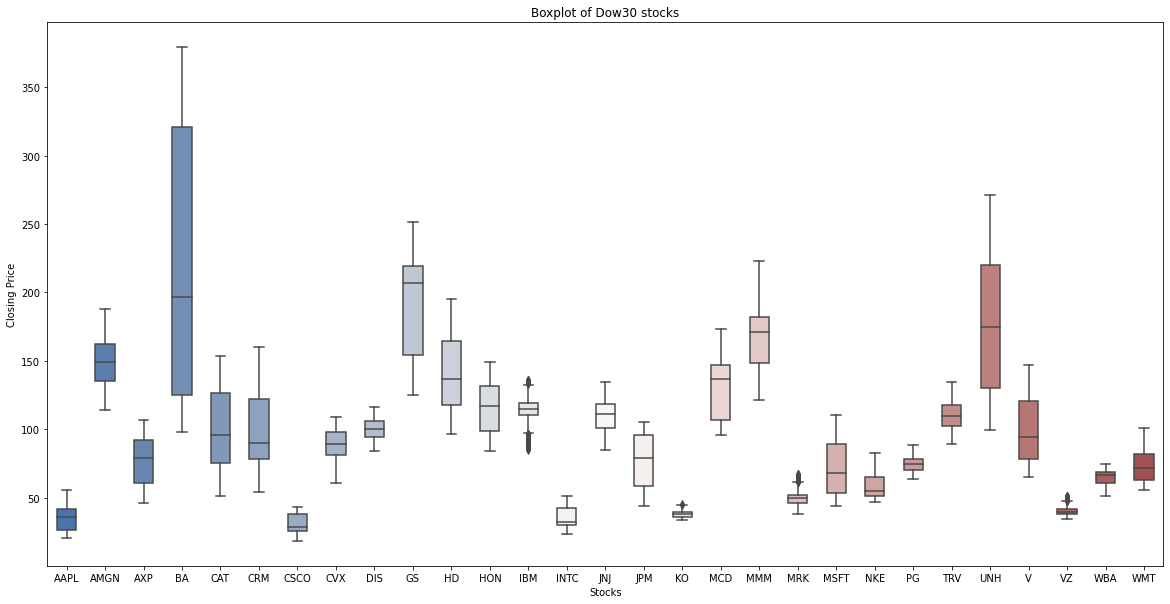

In [18]:
# Boxplot data
plt.figure(figsize=(20,10))
plt.title("Boxplot of Dow30 stocks")
plt.xlabel('Stocks') 
plt.ylabel('Closing Price') 

boxplot1 = sns.boxplot(data=PriceData, width=.5, palette="vlag")
print(boxplot1)


#we can see very extremes values regarding the stock with ticker "BA"

<AxesSubplot:title={'center':'Boxplot of Dow30 stocks'}, xlabel='Stocks', ylabel='Closing Price'>

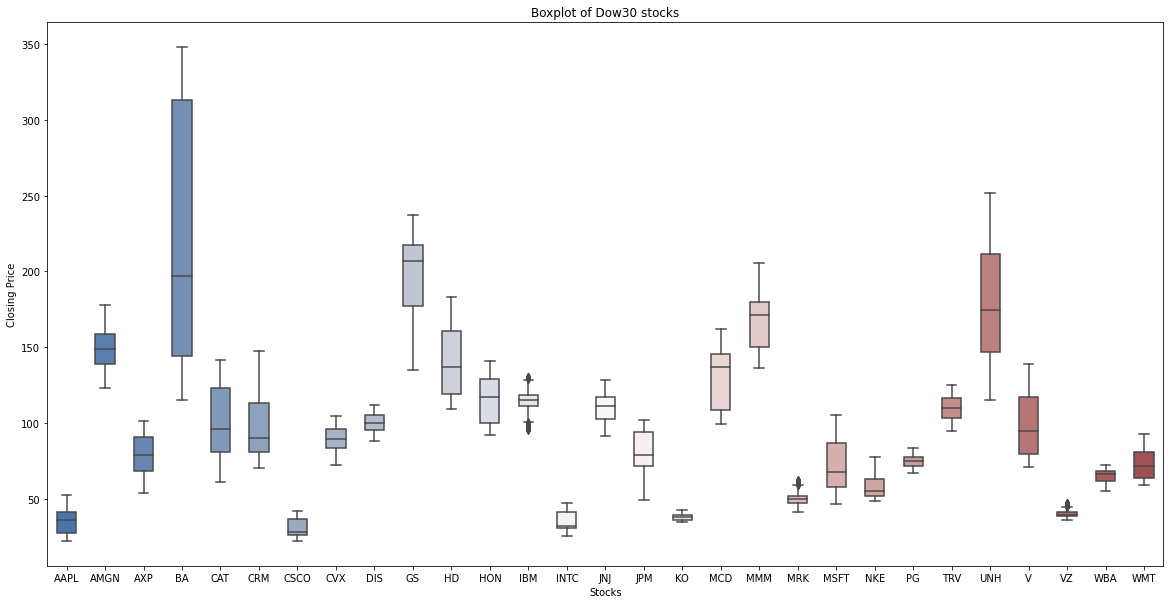

In [19]:
# Plot PriceDatFiltered
plt.figure(figsize=(20,10))
plt.title("Boxplot of Dow30 stocks")
plt.xlabel('Stocks') 
plt.ylabel('Closing Price') 
boxplot2= sns.boxplot(data=PriceDataFiltered, width=.5, palette="vlag")
(boxplot2)

In [51]:
PriceData.shape

(739, 29)

In [52]:
ReturnsData= PriceData.pct_change()
ReturnsData.columns.name = 'Stocks'
ReturnsData.index.name = 'Date'

ReturnsData.head(5)



Stocks          AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2016-01-29       NaN       NaN       NaN       NaN       NaN       NaN   
2016-02-01 -0.009348  0.000131  0.022430  0.011904  0.007391  0.005583   
2016-02-02 -0.020222 -0.017283 -0.019013 -0.033235 -0.032376 -0.057277   
2016-02-03  0.019792  0.003864  0.008386  0.037015  0.042855  0.012709   
2016-02-04  0.008035 -0.005176  0.004990  0.014277  0.042516  0.028466   

Stocks          CSCO       CVX       DIS        GS  ...       MRK      MSFT  \
Date                                                ...                       
2016-01-29       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2016-02-01 -0.013031 -0.013646 -0.006992 -0.011822  ...  0.001579 -0.006898   
2016-02-02 -0.027683 -0.047485 -0.021335 -0.049797  ... -0.006699 -0.031256   
2016-02-03  0.011827  0.041605  0.021692  0.006460  ... -0.007142 -0.015849   
2016-02-04  0.019048  0.002009  0.003048  0.024954  ... -0.029171 -0.003067   

Stocks           NKE        PG       TRV       UNH         V        VZ  \
Date                                                                     
2016-01-29       NaN       NaN       NaN       NaN       NaN       NaN   
2016-02-01  0.018545 -0.006977 -0.000281  0.006339 -0.001477  0.015809   
2016-02-02 -0.009658 -0.011095 -0.009158 -0.017344 -0.013176 -0.016746   
2016-02-03 -0.000959  0.010969  0.008111 -0.009923  0.013351  0.014225   
2016-02-04 -0.037126 -0.004932  0.005613  0.012860 -0.009411 -0.003753   

Stocks           WBA       WMT  
Date                            
2016-01-29       NaN       NaN  
2016-02-01  0.004391  0.017179  
2016-02-02 -0.025853 -0.009482  
2016-02-03 -0.015256 -0.008825  
2016-02-04  0.004947  0.002264  

[5 rows x 29 columns]

In [54]:
# Plot the returns
for i in range(5, ReturnsData.shape[1]+1,5):
    print(i)
    fig = px.area(ReturnsData.iloc[1:].iloc[0:,i:i+5], facet_col="Stocks", facet_col_wrap=2)
    fig.update_layout(
    title="Stock´s Returns",
    yaxis_title="Returns")
    fig.show()


5


10


15


20


25


In [55]:
# If we want a scatter plot of individual stocks
plots = {}
for i in ReturnsData.columns:
    plots[i] = px.scatter(ReturnsData, x=ReturnsData.index, y=i)


plots["MSFT"]

In [64]:
#Presenting using dash
from dash import Dash, dcc, html, Input, Output


app = Dash(__name__)


app.layout = html.Div([
    html.H4("Stock Price"),
    dcc.Graph(id="Stock Price"),
    html.P("Select Ticker:"),
    dcc.Dropdown(
        id="TICKER",
        options=list(ReturnsData.columns),
        value="AAPL",
        clearable=False,),])


@app.callback(
    Output("Stock Price", "figure"), 
    Input("TICKER", "value"))

def display_time_series(TICKER):
    df = ReturnsData # replace with your own data source
    fig = px.line(df, x=ReturnsData.index, y=TICKER)
    return fig


if __name__ == '__main__':
    app.run_server()


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Jul/2022 22:09:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:09:38] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:09:38] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:09:38] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:09:38] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:09:38] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:09:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:09:42] "POST /_dash-update-component HTTP/1.1" 200 -


# Momentum Strategy

In [73]:
def momentum (df):
    #________________________________________#
    
    # Calculate the 12 month returns for each stock - excluding last month

    momentumComputation=ReturnsData.rolling(window=11).sum().shift(2)
    
    #if the return doesnt exist on a certain date --> Delete from the Momemtum Computation Dataframe

    for i in range(0,len(ReturnsData.columns)):
        for l in range(0, len(ReturnsData.index)):
            if math.isnan(ReturnsData.iloc[l,i])==True:
                momentumComputation.iloc[l,i]=np.NaN
    
    
    # Allocate each stock to a percentile.
    momentum_allocation=pd.DataFrame(index=ReturnsData.index,columns=ReturnsData.columns)
  
    computation_columns=len(momentumComputation.columns)

    computation_rows=len(momentumComputation.index.values)
    
    #____________________________________________________________________________________________________________#
    percentiles=pd.DataFrame(index=ReturnsData.index,columns=["Percentile 10","Percentile 20","Percentile 30","Percentile 40",
                                                "Percentile 50","Percentile 60","Percentile 70","Percentile 80"
                                                ,"Percentile 90"])

    for i in range(12,computation_rows):
        percentiles["Percentile 10"][i]= np.nanpercentile(momentumComputation.iloc[i:i+1], 10)
        percentiles["Percentile 20"][i]= np.nanpercentile(momentumComputation.iloc[i:i+1], 20)
        percentiles["Percentile 30"][i]= np.nanpercentile(momentumComputation.iloc[i:i+1], 30)
        percentiles["Percentile 40"][i]= np.nanpercentile(momentumComputation.iloc[i:i+1], 40)
        percentiles["Percentile 50"][i]= np.nanpercentile(momentumComputation.iloc[i:i+1], 50)
        percentiles["Percentile 60"][i]= np.nanpercentile(momentumComputation.iloc[i:i+1], 60)
        percentiles["Percentile 70"][i]= np.nanpercentile(momentumComputation.iloc[i:i+1], 70)
        percentiles["Percentile 80"][i]= np.nanpercentile(momentumComputation.iloc[i:i+1], 80)
        percentiles["Percentile 90"][i]= np.nanpercentile(momentumComputation.iloc[i:i+1], 90)
        
     #________________________________________________________________________________#   
    for i in range(0,computation_rows):
        for j in range(0,computation_columns):
            if  str(momentumComputation.iloc[i,j])==str(np.nan):
                momentumComputation.iloc[i,j]=np.nan
            elif momentumComputation.iloc[i,j]<=percentiles.iloc[i,0]:
                momentum_allocation.iloc[i,j]=1
            elif percentiles.iloc[i,0]< momentumComputation.iloc[i,j]<=percentiles.iloc[i,1]:
                momentum_allocation.iloc[i,j]=2
            elif percentiles.iloc[i,1]< momentumComputation.iloc[i,j]<=percentiles.iloc[i,2]:
                momentum_allocation.iloc[i,j]=3
            elif percentiles.iloc[i,2]< momentumComputation.iloc[i,j]<=percentiles.iloc[i,3]:
                momentum_allocation.iloc[i,j]=4
            elif percentiles.iloc[i,3]< momentumComputation.iloc[i,j]<=percentiles.iloc[i,4]:
                momentum_allocation.iloc[i,j]=5
            elif percentiles.iloc[i,4]< momentumComputation.iloc[i,j]<=percentiles.iloc[i,5]:
                momentum_allocation.iloc[i,j]=6
            elif percentiles.iloc[i,5]< momentumComputation.iloc[i,j]<=percentiles.iloc[i,6]:
                momentum_allocation.iloc[i,j]=7
            elif percentiles.iloc[i,6]< momentumComputation.iloc[i,j]<=percentiles.iloc[i,7]:
                momentum_allocation.iloc[i,j]=8
            elif percentiles.iloc[i,7]< momentumComputation.iloc[i,j]<=percentiles.iloc[i,8]:
                momentum_allocation.iloc[i,j]=9
            else:
                momentum_allocation.iloc[i,j]=10
                
            #________________________________________#
    dates=list(ReturnsData.index)

    dfs=[]

    #The goal now is to create the 10 equal-weighted portfolio and creates the long-short portfolio, 
    #which is the difference between the portfolio with the stocks with the highest 12-month return and 
    #the portfolio with the lowest.

    for i in dates:
        df_allocationAuxiliar=pd.DataFrame(momentum_allocation.loc[i]).T.reset_index(drop=True).T  #Reset the index in order to have a non DataTimeIndex in both df4 and df5
        df_returnAuxiliar=pd.DataFrame(ReturnsData.loc[i])
        result = pd.concat([df_allocationAuxiliar,df_returnAuxiliar], axis=1, join="inner")
        #print(result)# merging the two dataframes (df_allocationAuxiliar and df_returnAuxiliar) and then append to the dfs - in a loop
        dfs.append(result.groupby(df_allocationAuxiliar.columns[0]).mean()) # then we calculate for each "percentile" the mean

    final_df = pd.concat(dfs, axis=1) #concatenate all the dfs above
    final_df=final_df.T # tranpose - for a question of ease

    final_df["Long-Short"]=final_df[10]-final_df[1]

    final_df["Cumulative"] = 1+ final_df['Long-Short'].cumsum()

    fig = px.line(final_df, x=final_df.index, y=final_df["Cumulative"])
    fig.update_traces(textposition="bottom right")
    fig.show()
    
    print("Long-Short Stats \n")
    print((final_df["Long-Short"]).describe())
    print("")
    print("Cumulative Stats \n")
    print((final_df["Cumulative"]).describe())
    
    #__________________________________________________________#
    
    #initialze the excel writer
    writer = pd.ExcelWriter('MomentumFile_Yahoo.xlsx',engine='xlsxwriter')


    ReturnsData.to_excel(writer, sheet_name="Returns")

    momentumComputation.to_excel(writer, sheet_name="Momentum Computation")

    percentiles.to_excel(writer, sheet_name='Percentiles')

    momentum_allocation.to_excel(writer, sheet_name='Momentum Allocation')

    final_df.to_excel(writer, sheet_name='Momentum Portfolio')
    
    
    app = Dash(__name__)


    app.layout = html.Div([
        html.H4("Percentile Return"),
        dcc.Graph(id="Percentile Return"),
        html.P("Percentile Return:"),
        dcc.Dropdown(
            id="Percentile",
            options=list(final_df.columns),
            value="1",
            clearable=False,),])


    @app.callback(
        Output("Percentile Return", "figure"), 
        Input("Percentile", "value"))

    def display_time_series(TICKER):
        df = final_df 
        fig = px.line(df, x=final_df.index, y=TICKER)
        return fig


    if __name__ == '__main__':
        app.run_server()

    #save
    writer.save()

In [74]:
momentum(ReturnsData)

Long-Short Stats 

count    726.000000
mean      -0.000449
std        0.010259
min       -0.043946
25%       -0.005846
50%       -0.000109
75%        0.005110
max        0.039302
Name: Long-Short, dtype: float64

Cumulative Stats 

count    726.000000
mean       0.821371
std        0.093987
min        0.598734
25%        0.751256
50%        0.823845
75%        0.888375
max        1.028661
Name: Cumulative, dtype: float64
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Jul/2022 22:21:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:21:21] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:21:21] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:21:21] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:21:21] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:21:21] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\franc\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\franc\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\franc\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\franc\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\franc\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\franc\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\franc\anaconda3\lib\site-packages\dash\dash.py", line 1472, in dispatch
    response.set_d

127.0.0.1 - - [09/Jul/2022 22:21:21] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [09/Jul/2022 22:21:21] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:21:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:21:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:21:26] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Jul/2022 22:21:29] "POST /_dash-update-component HTTP/1.1" 200 -
